# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 14 ноября

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [ ]:
N = 100
alpha = 0.95
def draw_confidence_interval(sample, estimate, low_bound, up_bound, title):
  n = np.arange(N) + 1
  plt.figure(figsize=(16, 10))
  plt.scatter(n, sample, alpha=0.3, s=40, label='sample')
  plt.plot(
      n, 
      estimate,
      color='red', 
      linewidth=2.5, 
      label=r'$\hat{\theta}$'
  ) 
  plt.fill_between(
      x=n, 
      y1=up_bound,
      y2=low_bound,
      alpha=0.15
  )
  plt.legend()
  plt.xlim((1, N))
  plt.ylim((0, 20))
  plt.xlabel(r'$n$')
  plt.ylabel(r'$\theta$')
  plt.title(f'Confidence interval for {title}')
  plt.show()


Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Доверительный интервал уровня доверия $\alpha$ для $U(0,\theta)$:

$$\frac{X_{(n)}}{(\frac{1+\alpha}{2})^{1/n}} \le \theta \le \frac{X_{(n)}}{(\frac{1-\alpha}{2})^{1/n}}$$

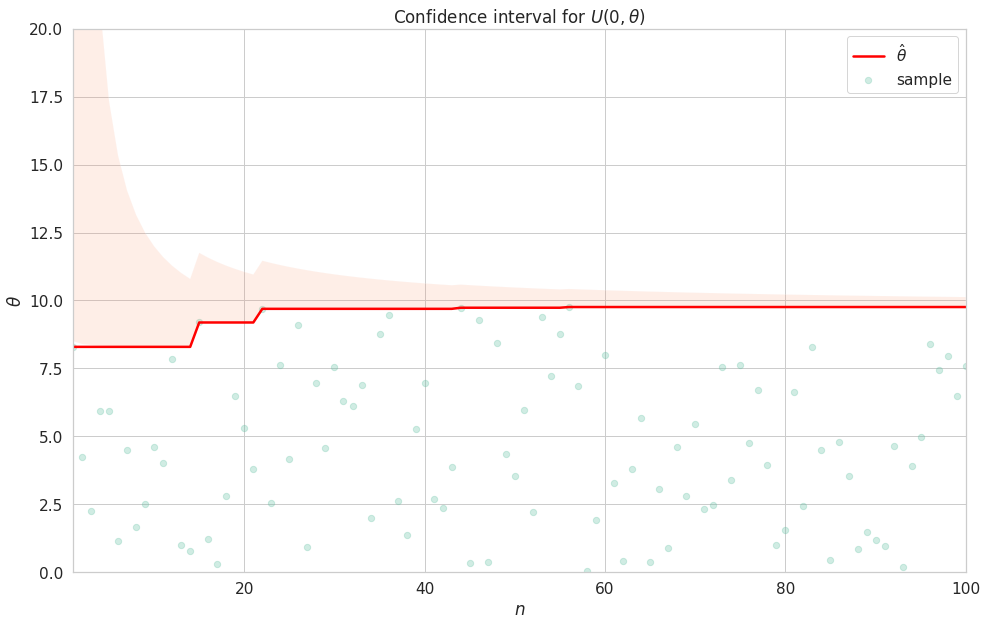

In [ ]:
theta_uniform = 10
sample_uniform = sps.uniform(scale=theta_uniform).rvs(size=N)
estimate_uniform = np.maximum.accumulate(sample_uniform)

low_bound = estimate_uniform / ((1 + alpha) / 2) ** (1 / np.arange(1, N + 1))
up_bound = estimate_uniform / ((1 - alpha) / 2) ** (1 / np.arange(1, N + 1))

draw_confidence_interval(sample_uniform, estimate_uniform, low_bound, up_bound, r'$U(0,\theta)$')

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Асимптотический доверительный интервал уровня доверия $\alpha$ для $Cauchy(\theta, 1)$:

$$\hat{\mu} - \frac{\pi}{2\sqrt{n}} u_{\frac{1+\alpha}{2}} \le \theta \le \hat{\mu} - \frac{\pi}{2\sqrt{n}} u_{\frac{1-\alpha}{2}}$$
, где $u_{\alpha}$ - $\alpha$-квантиль распределения $\mathcal{N}(0,1)$ 


In [ ]:
def cum_median(sample):
  return np.array([np.median(sample[:i]) for i in range(1, len(sample) + 1)])

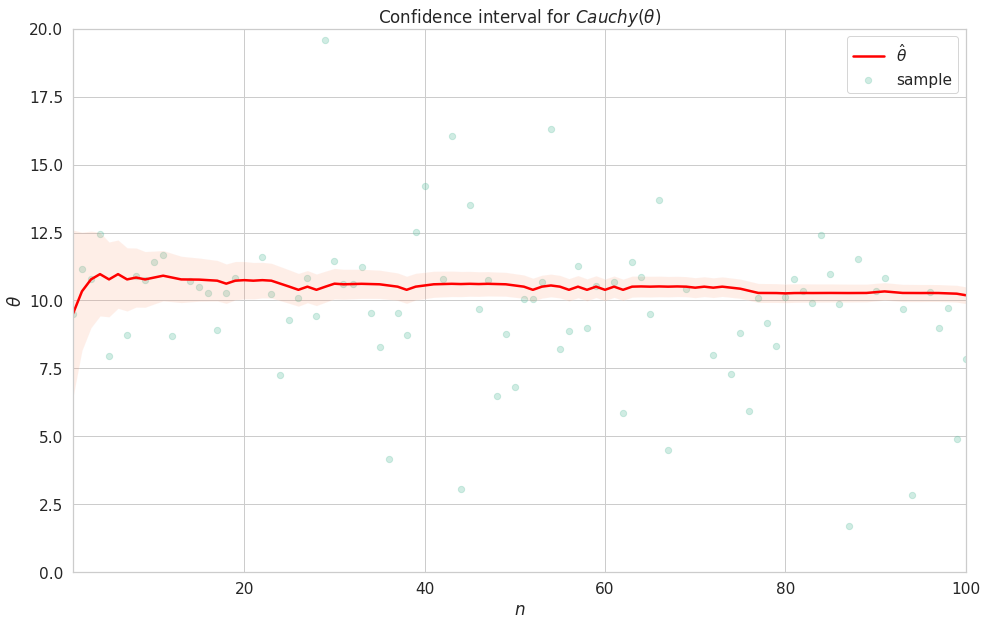

In [ ]:
theta_cauchy = 10
sample_cauchy = sps.cauchy(loc=theta_cauchy).rvs(size=N)
estimate_cauchy = cum_median(sample_cauchy)

low_bound = estimate_cauchy - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(np.arange(1, N + 1)))
up_bound = estimate_cauchy - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(np.arange(1, N + 1)))

draw_confidence_interval(sample_cauchy, estimate_cauchy, low_bound, up_bound, r'$Cauchy(\theta)$')

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Асимптотический доверительный интервал уровня доверия $\alpha$ для $Pois(\theta)$:

$$\overline{X} - \sqrt{\frac{\overline{X}}{n}} u_{\frac{1+\alpha}{2}} \le \theta \le \overline{X} - \sqrt{\frac{\overline{X}}{n}} u_{\frac{1-\alpha}{2}}$$
, где $u_{\alpha}$ - $\alpha$-квантиль распределения $\mathcal{N}(0,1)$ 

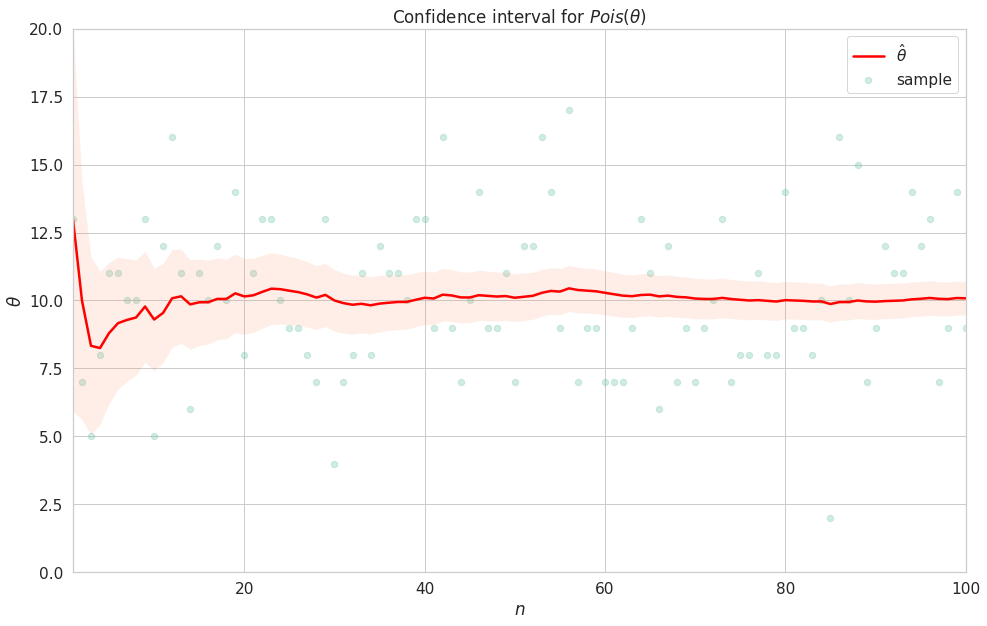

In [ ]:
theta_pois = 10
sample_pois = sps.poisson(mu=theta_pois).rvs(size=N)
estimate_pois = np.cumsum(sample_pois) / np.arange(1, N + 1)

low_bound = estimate_pois - np.sqrt(estimate_pois / np.arange(1, N + 1)) * sps.norm.ppf((1 + alpha) / 2)
up_bound = estimate_pois - np.sqrt(estimate_pois / np.arange(1, N + 1)) * sps.norm.ppf((1 - alpha) / 2)

draw_confidence_interval(sample_pois, estimate_pois, low_bound, up_bound, r'$Pois(\theta)$')

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Асимптотический доверительный интервал уровня доверия $\alpha$ для $\Gamma(\theta, \lambda)$ при известном $\lambda$:

$$\frac{\overline{X}}{\lambda + u_{\frac{1+\alpha}{2}} \sqrt{\frac{\lambda}{n}}} \le \theta \le \frac{\overline{X}}{\lambda + u_{\frac{1-\alpha}{2}} \sqrt{\frac{\lambda}{n}}}$$
, где $u_{\alpha}$ - $\alpha$-квантиль распределения $\mathcal{N}(0,1)$ 

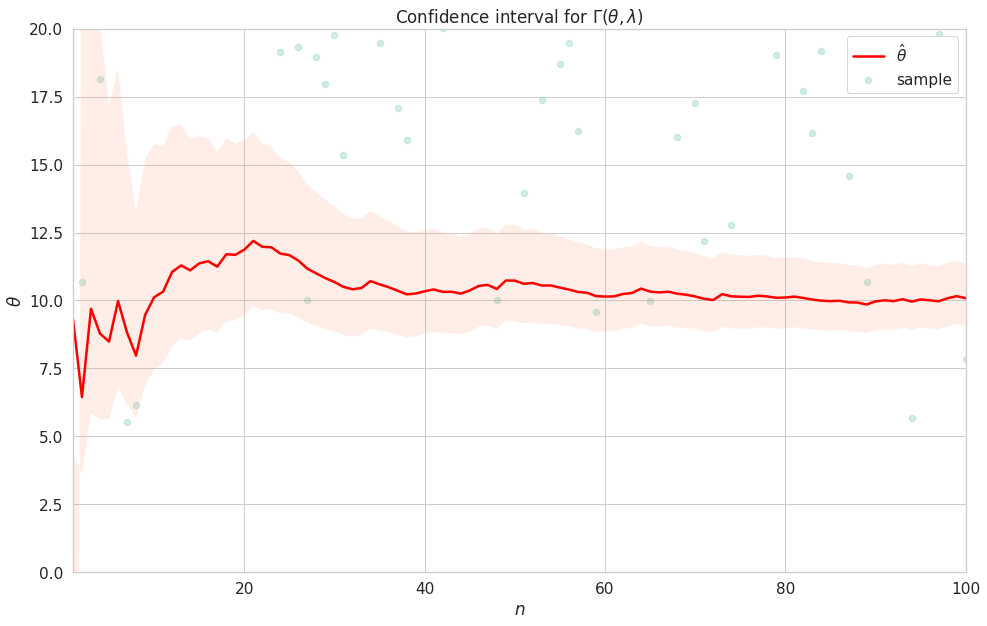

In [ ]:
theta_gamma = 10
lambda_gamma = 3
sample_gamma = sps.gamma(a=lambda_gamma, scale=theta_gamma).rvs(size=N)
estimate_gamma = np.cumsum(sample_gamma) / np.arange(1, N + 1) / lambda_gamma

low_bound = estimate_gamma * lambda_gamma / (lambda_gamma + np.sqrt(lambda_gamma / np.arange(1, N + 1)) * sps.norm.ppf((1 + alpha) / 2))
up_bound = estimate_gamma * lambda_gamma / (lambda_gamma + np.sqrt(lambda_gamma / np.arange(1, N + 1)) * sps.norm.ppf((1 - alpha) / 2))

draw_confidence_interval(sample_gamma, estimate_gamma, low_bound, up_bound, r'$\Gamma(\theta, \lambda)$')

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

__Вывод:__ 



*   Для равномерного распределения доверительный интервал снизу практически совпадает с оценкой $X_{(n)}$ (что логично, т.к. $P(X_{(n)} \le \theta) = 1$), и достаточно быстро сходится сверху. 
*   Для распределений Коши, Пуассона и Гамма распределения видна зависимость ширины интервала от асимптотической дисперсии оценок.



# Задача 2

Для $n = 100$ оцените для каждого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать следующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__
$n = \frac{U^2_{\frac{1+\gamma}{2}}p(1-p)}{\varepsilon^2} \sim 5000$ при $\varepsilon=0.005$ и $\gamma = 0.95$

In [ ]:
n = 100
n_samples = 5000

### Равномерное распределение

In [ ]:
sum_uniform = 0
for i in range(n_samples):
  sample_uniform = sps.uniform(scale=theta_uniform).rvs(size=n)
  estimate_uniform = max(sample_uniform)

  low_bound = estimate_uniform / ((1 + alpha) / 2) ** (1 / n)
  up_bound = estimate_uniform / ((1 - alpha) / 2) ** (1 / n)

  sum_uniform += (low_bound <= theta_uniform <= up_bound)

print('Вероятность попадания параметра в доверительный интервал =', sum_uniform / n_samples, '+- 0.005')

Вероятность попадания параметра в доверительный интервал = 0.9454 +- 0.005


### Распределение Коши

In [ ]:
sum_cauchy = 0
for i in range(n_samples):
  sample_cauchy = sps.cauchy(loc=theta_cauchy).rvs(size=N)
  estimate_cauchy = np.median(sample_cauchy)

  low_bound = estimate_cauchy - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(n))
  up_bound = estimate_cauchy - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(n))

  sum_cauchy += (low_bound <= theta_cauchy <= up_bound)

print('Вероятность попадания параметра в доверительный интервал =', sum_cauchy / n_samples, '+- 0.005')

Вероятность попадания параметра в доверительный интервал = 0.9446 +- 0.005


### Распределение Пуассона

In [ ]:
sum_pois = 0
for i in range(n_samples):
  sample_pois = sps.poisson(mu=theta_pois).rvs(size=N)
  estimate_pois = np.mean(sample_pois)

  low_bound = estimate_pois - np.sqrt(estimate_pois / n) * sps.norm.ppf((1 + alpha) / 2)
  up_bound = estimate_pois - np.sqrt(estimate_pois / n) * sps.norm.ppf((1 - alpha) / 2)

  sum_pois += (low_bound <= theta_pois <= up_bound)

print('Вероятность попадания параметра в доверительный интервал =', sum_pois / n_samples, '+- 0.005')

Вероятность попадания параметра в доверительный интервал = 0.9504 +- 0.005


### Гамма-распределение

In [ ]:
sum_gamma = 0
for i in range(n_samples):
  sample_gamma = sps.gamma(a=lambda_gamma, scale=theta_gamma).rvs(size=N)
  estimate_gamma = np.mean(sample_gamma) / lambda_gamma

  low_bound = estimate_gamma * lambda_gamma / (lambda_gamma + np.sqrt(lambda_gamma / n) * sps.norm.ppf((1 + alpha) / 2))
  up_bound = estimate_gamma * lambda_gamma / (lambda_gamma + np.sqrt(lambda_gamma / n) * sps.norm.ppf((1 - alpha) / 2))

  sum_gamma += (low_bound <= theta_gamma <= up_bound)

print('Вероятность попадания параметра в доверительный интервал =', sum_gamma / n_samples, '+- 0.005')

Вероятность попадания параметра в доверительный интервал = 0.952 +- 0.005


Сделайте выводы.



__Вывод:__ 
Экспериментально подтвердили, что построенные в предыдущем пункте доверительные интервалы, имеют уровень доверия 95%. 

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интервалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного интервала уровня доверия $\alpha$ для $a$:
$$\overline{X} - \frac{\sigma}{n}U_{\frac{1+\alpha}{2}} \le a \le \overline{X} - \frac{\sigma}{n}U_{\frac{1-\alpha}{2}}$$

* асимптотического доверительного интервала уровня доверия $\alpha$ для $a$
$$\overline{X} - \frac{\sigma}{\sqrt{n}}U_{\frac{1+\alpha}{2}} \le a \le \overline{X} - \frac{\sigma}{\sqrt{n}}U_{\frac{1-\alpha}{2}}$$

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [ ]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    n = len(sample)
    mean = sample.mean()
    low_bound = mean - sps.norm.ppf((1 + alpha) / 2) / n
    up_bound = mean - sps.norm.ppf((1 - alpha) / 2) / n
    return mean, low_bound, up_bound

In [ ]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    n = len(sample)
    mean = sample.mean()
    low_bound = mean - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n)
    up_bound = mean - sps.norm.ppf((1 - alpha) / 2) / np.sqrt(n)
    return mean, low_bound, up_bound

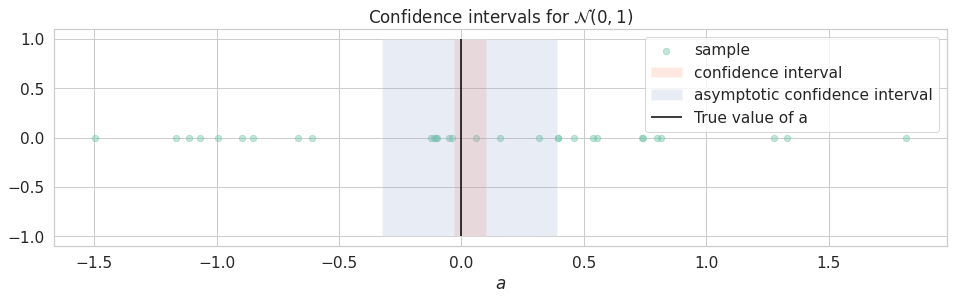

In [ ]:
sample = sps.norm.rvs(size=30)
mean, low_bound, up_bound = calculate_conf_interval(sample)
asymp_mean, asymp_low_bound, asymp_up_bound = calculate_asymptotic_conf_interval(sample)

n = np.arange(30) + 1
plt.figure(figsize=(16, 4))
plt.scatter(sample, [0] * 30, alpha=0.4, s=40, label='sample')
plt.fill_betweenx(
  y=[-1, 1], 
  x1=up_bound,
  x2=low_bound,
  alpha=0.2,
  label='confidence interval'
)
plt.fill_betweenx(
  y=[-1, 1],
  x1=asymp_up_bound,
  x2=asymp_low_bound,
  alpha=0.2,
  label='asymptotic confidence interval'
)
plt.vlines(x=0, ymin=-1, ymax=1, label='True value of a')
plt.legend()
# plt.xlim((1, 30))
# plt.ylim((0, 20))
plt.xlabel(r'$a$')
# plt.ylabel(r'$a$')
plt.title(r'Confidence intervals for $\mathcal{N}(0, 1)$')
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown 1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp

Downloading...
From: https://drive.google.com/uc?id=1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp
To: /content/city_day.csv
100% 2.57M/2.57M [00:00<00:00, 203MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [ ]:
df = pd.read_csv('city_day.csv', parse_dates=[1])[['City', 'Date', 'AQI']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    29531 non-null  object        
 1   Date    29531 non-null  datetime64[ns]
 2   AQI     24850 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 692.3+ KB


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df.head(10)

,City,Date,AQI,Month,Year
0,Ahmedabad,2015-01-01,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,1,2015
5,Ahmedabad,2015-01-06,NaN,1,2015
6,Ahmedabad,2015-01-07,NaN,1,2015
7,Ahmedabad,2015-01-08,NaN,1,2015
8,Ahmedabad,2015-01-09,NaN,1,2015
9,Ahmedabad,2015-01-10,NaN,1,2015


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
mumbai = df[df.City == 'Mumbai']
kolkata = df[df.City == 'Kolkata']

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстрепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включительно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    df_year = df[df.Year == year]
    return df_year[df_year.Month == month].AQI.dropna()

In [ ]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    return np.random.choice(sample[:max(len(sample), k)], (k, k))

In [ ]:
import math

def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    k = len(sample)
    subsamples = get_bootstrap_samples(sample, k)
    thetas = estimator(subsamples)
    mean = thetas.mean()
    low_bound = np.sort(thetas)[math.ceil(k * (1 - alpha) / 2) - 1]
    up_bound = np.sort(thetas)[math.floor(k * (1 + alpha) / 2) - 1]
    return mean, low_bound, up_bound

In [ ]:
def get_intervals(df):
  periods = pd.to_datetime('2018.07') + pd.timedelta_range(start=0, periods=24, end='2Y')
  means = []
  low_bounds = []
  up_bounds = []
  for period in periods:
    month = period.month
    year = period.year
    sample = get_dataset_by_month(df, year, month)
    mean, low_bound, up_bound = bootstrap_conf_interval(sample)
    means.append(sample.mean())
    low_bounds.append(low_bound)
    up_bounds.append(up_bound)
  return np.array(means), np.array(low_bounds), np.array(up_bounds)

In [ ]:
means_mumbai, low_bounds_mumbai, up_bounds_mumbai = get_intervals(mumbai)
means_kolkata, low_bounds_kolkata, up_bounds_kolkata = get_intervals(kolkata)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/timedeltas.py:299: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  tdarr = TimedeltaArray._generate_range(start, end, periods, freq, closed=closed)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/timedeltas.py:299: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  tdarr = TimedeltaArray._generate_range(start, end, periods, freq, closed=closed)


Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

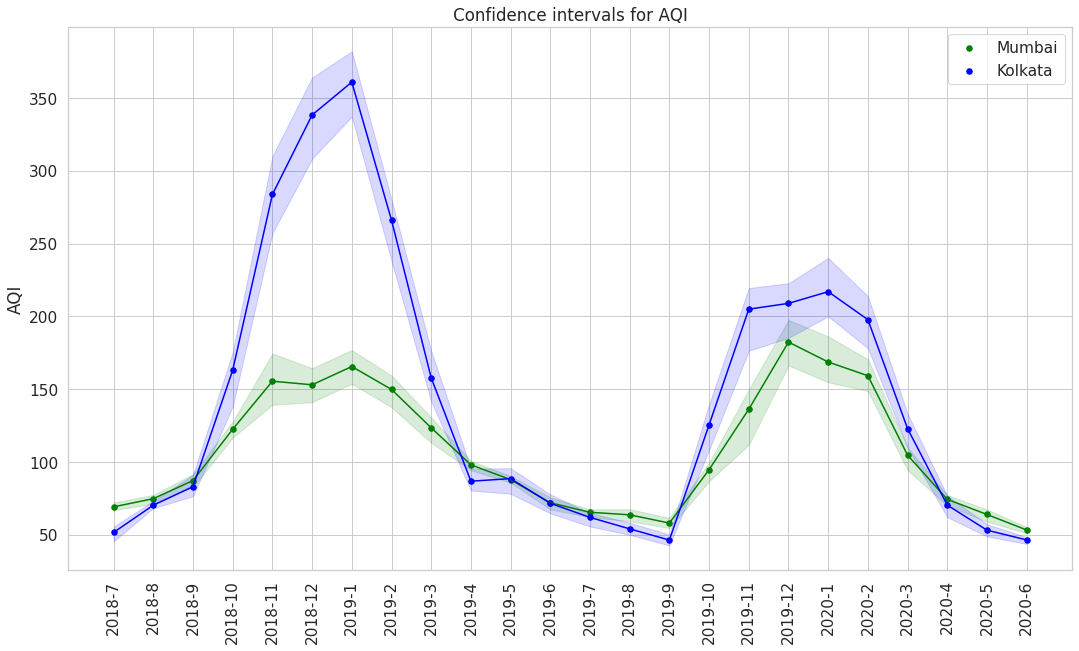

In [ ]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[-25:]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

n = np.arange(24)
plt.figure(figsize=(18, 10))
plt.scatter(n, means_mumbai, s=30, color='green', label='Mumbai')
plt.plot(
  n, 
  means_mumbai,
  color='green'
) 
plt.fill_between(
  x=n, 
  y1=up_bounds_mumbai,
  y2=low_bounds_mumbai,
  alpha=0.15,
  color='green'
)
plt.scatter(n, means_kolkata, s=30, color='blue', label='Kolkata')
plt.plot(
  n, 
  means_kolkata,
  color='blue'
) 
plt.fill_between(
  x=n, 
  y1=up_bounds_kolkata,
  y2=low_bounds_kolkata,
  alpha=0.15,
  color='blue'
)
plt.legend()
plt.xticks(n, labels, rotation=90)
plt.ylabel('AQI')
plt.title('Confidence intervals for AQI')
plt.show()


Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

**Ответ:**
Заметна сезонность. С октября по март среднее значение выше, а интервал больше

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

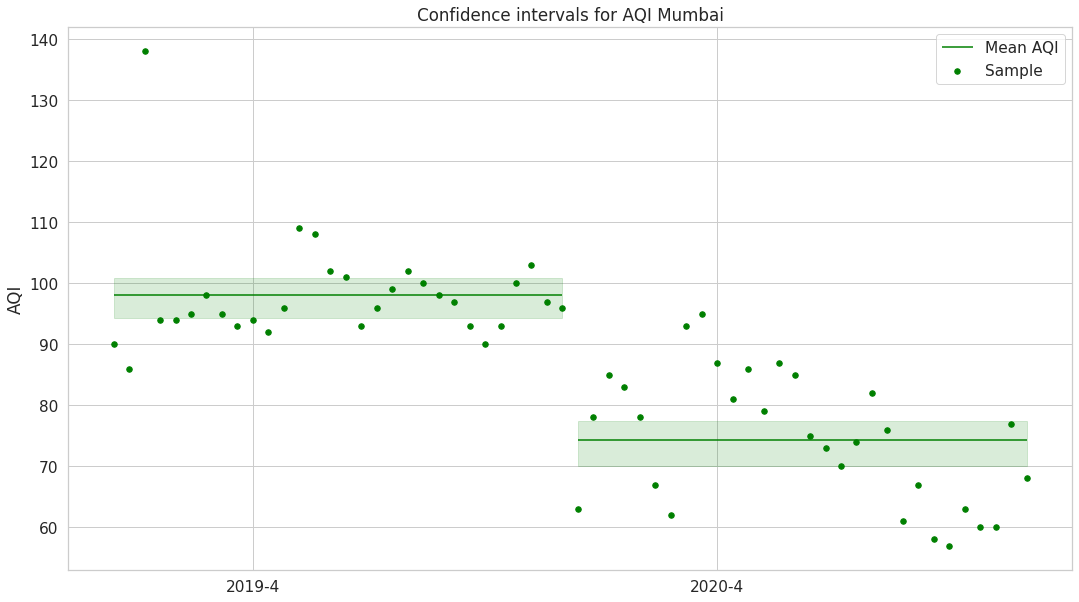

In [ ]:
mumbai201904 = get_dataset_by_month(mumbai, 2019, 4)
mumbai202004 = get_dataset_by_month(mumbai, 2020, 4)

n_19 = np.arange(len(mumbai201904))
n_20 = np.arange(len(mumbai201904), len(mumbai202004) + len(mumbai201904))

plt.figure(figsize=(18, 10))
plt.hlines(y=means_mumbai[9], xmin=0, xmax=n_19[-1], color='green', label='Mean AQI')
plt.hlines(y=means_mumbai[21], xmin=n_20[0], xmax=n_20[-1], color='green')
plt.fill_between(
  x=n_19, 
  y1=[up_bounds_mumbai[9]] * len(n_19),
  y2=[low_bounds_mumbai[9]] * len(n_19),
  alpha=0.15,
  color='green'
)
plt.fill_between(
  x=n_20, 
  y1=[up_bounds_mumbai[21]] * len(n_20),
  y2=[low_bounds_mumbai[21]] * len(n_20),
  alpha=0.15,
  color='green'
)
plt.scatter(n_19, mumbai201904, s=30, color='green', label='Sample')
plt.scatter(n_20, mumbai202004, s=30, color='green')

plt.legend()
plt.xticks([n_19[9], n_20[9]], [labels[9], labels[21]])
plt.ylabel('AQI')
plt.title('Confidence intervals for AQI Mumbai')
plt.show()

Теперь проделайте то же самое для Калькутты

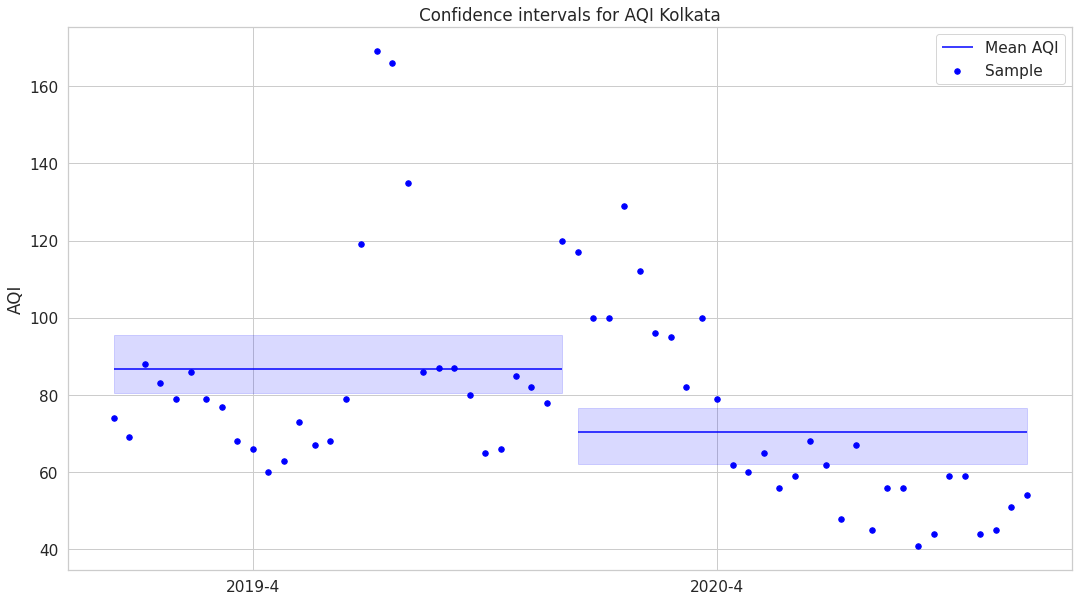

In [ ]:
kolkata201904 = get_dataset_by_month(kolkata, 2019, 4)
kolkata202004 = get_dataset_by_month(kolkata, 2020, 4)

n_19 = np.arange(len(kolkata201904))
n_20 = np.arange(len(kolkata201904), len(kolkata202004) + len(kolkata201904))

plt.figure(figsize=(18, 10))
plt.hlines(y=means_kolkata[9], xmin=0, xmax=n_19[-1], color='blue', label='Mean AQI')
plt.hlines(y=means_kolkata[21], xmin=n_20[0], xmax=n_20[-1], color='blue')
plt.fill_between(
  x=n_19, 
  y1=[up_bounds_kolkata[9]] * len(n_19),
  y2=[low_bounds_kolkata[9]] * len(n_19),
  alpha=0.15,
  color='blue'
)
plt.fill_between(
  x=n_20, 
  y1=[up_bounds_kolkata[21]] * len(n_20),
  y2=[low_bounds_kolkata[21]] * len(n_20),
  alpha=0.15,
  color='blue'
)
plt.scatter(n_19, kolkata201904, s=30, color='blue', label='Sample')
plt.scatter(n_20, kolkata202004, s=30, color='blue')

plt.legend()
plt.xticks([n_19[9], n_20[9]], [labels[9], labels[21]])
plt.ylabel('AQI')
plt.title('Confidence intervals for AQI Kolkata')
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?